<a href="https://colab.research.google.com/github/luoterolb/MIT_mod3/blob/main/3_1_caso_challenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de estudio 3.1: el lanzamiento del Challenger

Configuración del notebook:

Sincronice su cuenta de Google. Para ello, siga el link que aparece en la salida de la siguiente celda una vez ejecutada. Copie el código que le aparece en pantalla e introdúzcalo en la salida de la celda. Una vez vea el mensaje: `Google Drive sincronizado con éxito!` puede continuar ejecutando el resto de celdas.

In [ ]:
from google.colab import auth
auth.authenticate_user()

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
data_drop = drive.CreateFile({'id':'1EsvjOlPQpss37_qQF-cXvCUi0IrPUs33'})
data_drop.GetContentFile('challenger-data.csv')

print('Google Drive sincronizado con éxito!')

Google Drive sincronizado con éxito!


Instalando las librerías necesarias:

In [ ]:
import pandas as pd
import numpy as np

from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm

import matplotlib as mpl
from matplotlib import pyplot as plt

# Datos

Importando los datos de la base de datos `challenger-data.csv`

import pandas as pd
import numpy as np

data = pd.read_csv("challenger-data.csv")

In [ ]:
#import pandas as pd import numpy as np

data = pd.read_csv("challenger-data.csv")

Análisis exploratorio preliminar

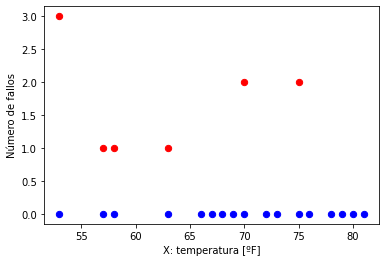

In [ ]:
# hacer subconjuntos de datos
failures = data.loc[(data.Y == 1)]
no_failures = data.loc[(data.Y == 0)]

# frecuencias
failures_freq = failures.X.value_counts()
no_failures_freq = no_failures.X.value_counts()

# mostrar los gráficos
plt.scatter(failures_freq.index, failures_freq, c='red', s=40)
plt.scatter(no_failures_freq.index, np.zeros(len(no_failures_freq)),
c='blue', s=40)
plt.xlabel('X: temperatura [ºF]')
plt.ylabel('Número de fallos')
plt.show()

# Definición del modelo y obtención de resultados

In [ ]:
# obtenga los datos en el formato correcto
y, X = dmatrices('Y ~ X', data, return_type = 'dataframe')

# ejecute el modelo
logit = sm.Logit(y, X)
result = logit.fit()

# obtenga un resumen de los resultados el modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Oct 2022   Pseudo R-squ.:                  0.1549
Time:                        01:34:15   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.